In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 3.1 Multi-resolution Lucas-Kanade optic flow detection

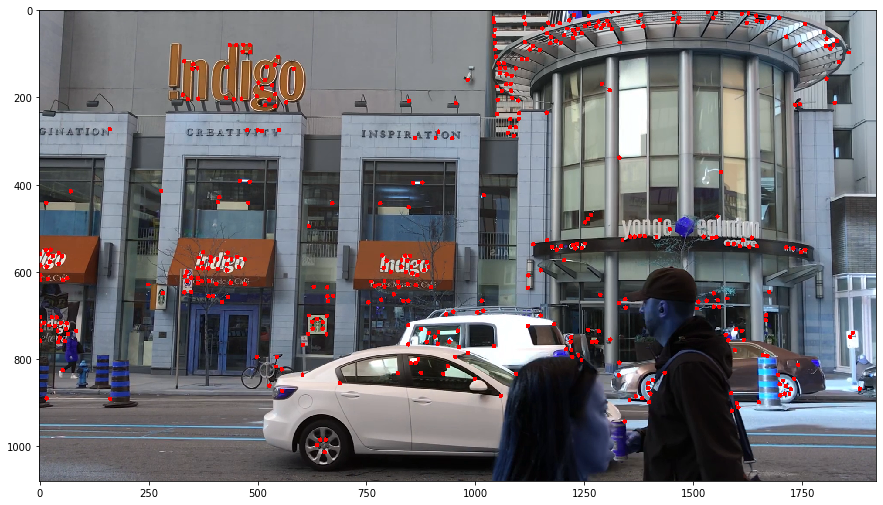

(<matplotlib.image.AxesImage at 0x11e834d10>, None)

In [3]:
# read images
img1 = cv2.imread("frame1.png")
imgcorner=img1.copy();
# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_disp=img1_gray.copy()

# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.05,
                       minDistance = 10,
                       blockSize = 2,
                     useHarrisDetector=True)
#maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
#qualityLevel – Parameter characterizing the minimal accepted quality of image corners. 
        #The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue 
#minDistance – Minimum possible Euclidean distance between the returned corners.
#blockSize – Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. See cornerEigenValsAndVecs() .

# find good corners in the first image
p1 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)
p11 = np.int0(p1)

for i in p11:
    x,y = i.ravel()
    cv2.circle(imgcorner,(x,y),5,(255,0,0),-5)
#cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
plt.figure(figsize=(15,15))
plt.imshow(imgcorner),plt.show()


#finding good points in frame1 by using the Harris Corner detector, p1

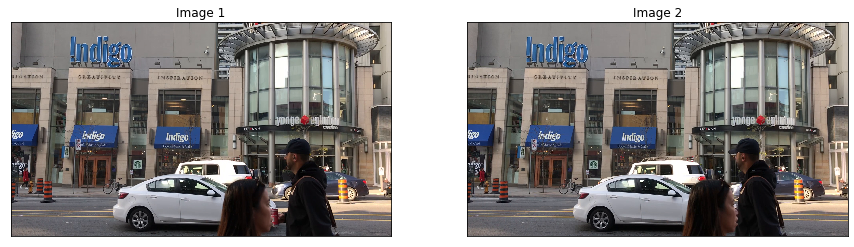

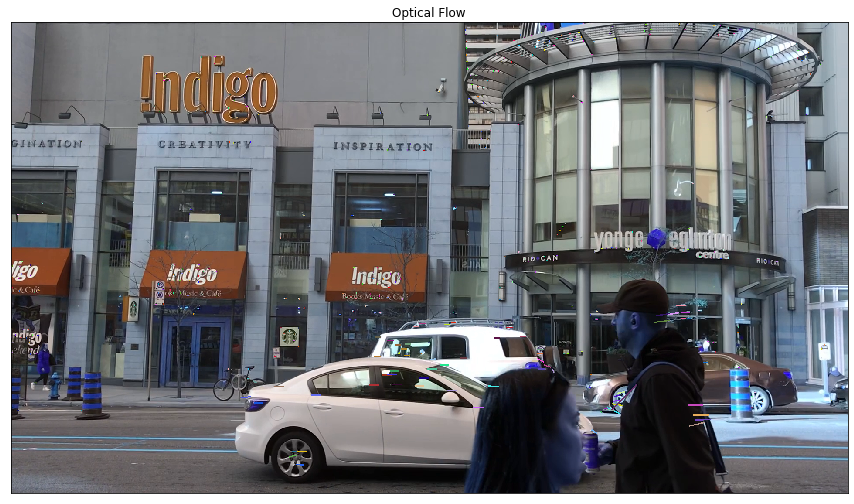

In [4]:
# read images
img2 = cv2.imread("frame2.png")

# convert to grayscale
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# parameters for lucas kanade optical flow
lk_params = dict( winSize = (17,17),
                  maxLevel = 8,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.8))
#winSize – size of the search window at each pyramid level.

#maxLevel – 0-based maximal pyramid level number; if set to 0, pyramids are not used (single level), 
#if set to 1, two levels are used, and so on; if pyramids are passed to input then algorithm
#will use as many levels as pyramids have but no more than maxLevel.

#criteria – parameter, specifying the termination criteria of the iterative search algorithm 
#(after the specified maximum number of iterations criteria.maxCount or when the 
#search window moves by less than criteria.epsilon.


# calculate optical flow
p2, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, **lk_params)

#prevImg – first 8-bit input image or pyramid constructed by buildOpticalFlowPyramid().
#nextImg – second input image or pyramid of the same size and the same type as prevImg.
#prevPts – vector of 2D points for which the flow needs to be found; point coordinates must be single-precision floating-point numbers.
#nextPts – output vector of 2D points (with single-precision floating-point coordinates) containing the calculated new positions of input features in the second image; when OPTFLOW_USE_INITIAL_FLOW flag is passed, the vector must have the same size as in the input.
#status – output status vector (of unsigned chars); each element of the vector is set to 1 if the flow for the corresponding features has been found, otherwise, it is set to 0.
#err – output vector of errors; each element of the vector is set to an error for the corresponding feature, type of the error measure can be set in flags parameter; if the flow wasn’t found then the error is not defined (use the status parameter to find such cases).

# select good points
good_new = p2[st==1]
good_old = p1[st==1]

# create some random colors
color = np.random.randint(0, 255, (good_new.shape[0], 3))

# create a mask image for drawing purposes
mask = img1.copy()

# draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
plt.show()


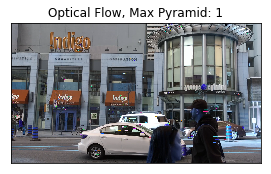

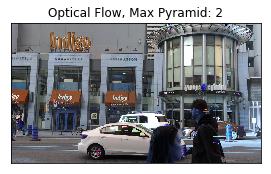

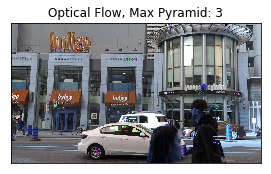

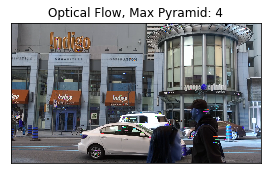

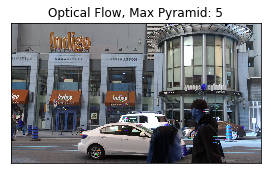

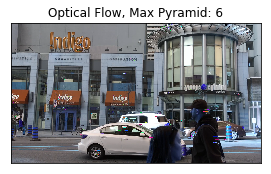

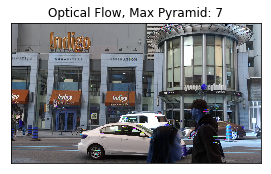

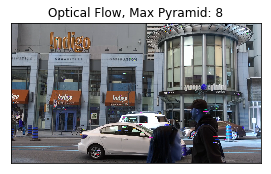

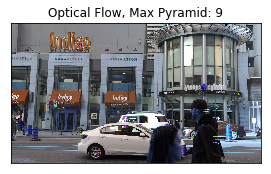

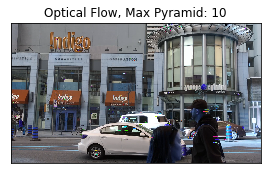

[9.979064]
[9.204944]
[9.069117]
[9.065146]
[9.062102]
[9.045609]
[9.014063]
[8.994618]
[8.970992]
[8.9569845]


(Text(0.5,1,'Mean vs. Pyramid Level'),
 Text(0,0.5,'Mean'),
 Text(0.5,0,'Pyramid Level'))

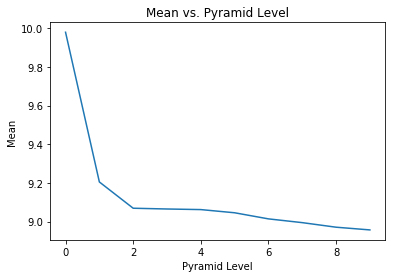

In [147]:
mean=[]

# create a mask image for drawing purposes, Displaying the image
mask = img1.copy()

for y in range (1,11):
    count=0
    sums=0
    
    lk_params = dict( winSize = (17,17),
                      maxLevel = 8,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 y, 0.8))

    p2, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, **lk_params)
    
    for idx,z in enumerate(st):
        if z==1:
            sums+=err[idx]
            count+=1
    
    meancalc=sums/count
   # print(meancalc)
    mean.append(meancalc)
    
    #------------------------------ Xxxxx Display Flow: xxxXXXX -------------------------


        # select good points
    good_new = p2[st==1]
    good_old = p1[st==1]

    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)

    # display images
    plt.figure(figsize=(15,15))

    plt.subplot(5,2,y)
    plt.imshow(mask)
    plt.title("Optical Flow, Max Pyramid: "+str(y)), plt.xticks([]), plt.yticks([])
plt.show()

for z in mean:
    print(z)
plt.plot(mean)
plt.title("Mean vs. Pyramid Level") ,plt.ylabel('Mean'), plt.xlabel('Pyramid Level')

        
    

comment on the quality of the results.<br/>
we see that as pyramid level increases mean decreases